In [1]:
# Importing the necessary module for Spark SQL
from pyspark.sql import SparkSession

# Creating a Spark session with Hive support enabled
spark = SparkSession.builder.enableHiveSupport().getOrCreate()

In [2]:
# GCS file path specifying the location of the CSV file in Google Cloud Storage
gcs_file_path = "gs://vernal-hall-403418/InputData/CrimeData.csv"

# Reading the CSV file from the specified GCS path into a Spark DataFrame
df = spark.read.csv(gcs_file_path, header=True, inferSchema=True)

In [3]:
# Importing the necessary module for Google Cloud Storage
from google.cloud import storage

# Specifying the name of the Google Cloud Storage (GCS) bucket
gcs_bucket_name = "vernal-hall-403418"

# Creating a Google Cloud Storage client
storage_client = storage.Client()

# Retrieving the GCS bucket with the specified name
gcs_bucket = storage_client.get_bucket(gcs_bucket_name)

In [4]:
# Counting the number of rows in the DataFrame
num_rows = df.count()

# Extracting the column names from the DataFrame
columns = df.columns

# Calculating the number of columns in the DataFrame
num_columns = len(columns)

# Printing the results
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print(f"Column Names: {columns}")

Number of Rows: 802956
Number of Columns: 28
Column Names: ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [5]:
# Printing the data types of each column in the DataFrame
print("Data Types:")
for col_name, col_type in df.dtypes:
    print(f"{col_name}: {col_type}")

Data Types:
DR_NO: int
Date Rptd: string
DATE OCC: string
TIME OCC: int
AREA: int
AREA NAME: string
Rpt Dist No: int
Part 1-2: int
Crm Cd: int
Crm Cd Desc: string
Mocodes: string
Vict Age: int
Vict Sex: string
Vict Descent: string
Premis Cd: int
Premis Desc: string
Weapon Used Cd: int
Weapon Desc: string
Status: string
Status Desc: string
Crm Cd 1: int
Crm Cd 2: int
Crm Cd 3: int
Crm Cd 4: int
LOCATION: string
Cross Street: string
LAT: double
LON: double


In [6]:
# Importing necessary functions from PySpark
from pyspark.sql.functions import col, sum as spark_sum

# Counting the number of null values in each column of the DataFrame
null_counts = df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

In [7]:
# Counting the number of rows in the DataFrame before removing duplicates
num_duplicates_before = df.count()

# Dropping duplicate rows from the DataFrame
df_no_duplicates = df.dropDuplicates()

# Counting the number of rows in the DataFrame after removing duplicates
num_duplicates_after = df_no_duplicates.count()

# Calculating the number of duplicate rows
num_duplicates = num_duplicates_before - num_duplicates_after

# Printing the result
print(f"Number of Duplicate Rows: {num_duplicates}")

Number of Duplicate Rows: 0


In [8]:
# List of column names to be dropped from the DataFrame
columns_to_drop = ['LAT', 'LON', 'Cross Street', 'Premis Desc']

# Dropping specified columns from the DataFrame
df = df.drop(*columns_to_drop)

In [9]:
# Importing the necessary functions from PySpark
from pyspark.sql.functions import to_timestamp, col

# Specifying the datetime format for parsing
datetime_format = "M/d/yyyy H:mm"

# Converting the "Date Rptd" column to timestamp format
df = df.withColumn("Date Rptd", to_timestamp(col("Date Rptd"), datetime_format))

# Converting the "DATE OCC" column to timestamp format
df = df.withColumn("DATE OCC", to_timestamp(col("DATE OCC"), datetime_format))

In [10]:
# Importing necessary functions from PySpark
from pyspark.sql.functions import avg

# Calculating the mean of the 'Crm Cd 1' column in the DataFrame
mean_crm_cd_1 = df.agg(avg(col("Crm Cd 1")).alias("Mean_Crm_Cd_1")).collect()[0]["Mean_Crm_Cd_1"]

# Printing the result
print(f"Mean of 'Crm Cd 1': {mean_crm_cd_1}")

Mean of 'Crm Cd 1': 500.48170113556824


In [11]:
# Filling null values in the "Crm Cd 1" column with the calculated mean of "Crm Cd 1"
df = df.fillna(mean_crm_cd_1, subset=["Crm Cd 1"])

In [12]:
# Calculating the mean of the "Crm Cd 2" column
mean_crm_cd_2 = df.agg(avg(col("Crm Cd 2")).alias("Mean_Crm_Cd_2")).collect()[0]["Mean_Crm_Cd_2"]

# Printing the result
print(f"Mean of 'Crm Cd 2': {mean_crm_cd_2}")

Mean of 'Crm Cd 2': 957.4310446852757


In [13]:
# Filling null values in the "Crm Cd 2" column with the calculated mean of "Crm Cd 2"
df = df.fillna(mean_crm_cd_2, subset=["Crm Cd 2"])

In [14]:
# Calculating the mean of the "Crm Cd 3" column
mean_crm_cd_3 = df.agg(avg(col("Crm Cd 3")).alias("Mean_Crm_Cd_3")).collect()[0]["Mean_Crm_Cd_3"]

# Displaying the mean of 'Crm Cd 3'
mean_crm_cd_3

983.8928934010153

In [15]:
# Filling null values in the "Crm Cd 3" column with the calculated mean of "Crm Cd 3"
df = df.fillna(mean_crm_cd_3, subset=["Crm Cd 3"])

In [16]:
# Calculating the mean of the "Crm Cd 4" column
mean_crm_cd_4 = df.agg(avg(col("Crm Cd 4")).alias("Mean_Crm_Cd_4")).collect()[0]["Mean_Crm_Cd_4"]

# Filling null values in the "Crm Cd 4" column with the calculated mean of "Crm Cd 4"
df = df.fillna(mean_crm_cd_4, subset=["Crm Cd 4"])

# Calculating the mean of the "Premis Cd" column
mean_premis_cd = df.agg(avg(col("Premis Cd")).alias("Mean_Premis_Cd")).collect()[0]["Mean_Premis_Cd"]

In [17]:
# Filling null values in the "Premis Cd" column with the calculated mean of "Premis Cd"
df = df.fillna(mean_premis_cd, subset=["Premis Cd"])

# Calculating the mean of the "Weapon Used Cd" column
mean_weapon_used_cd = df.agg(avg(col("Weapon Used Cd")).alias("Mean_Weapon_Used_Cd")).collect()[0]["Mean_Weapon_Used_Cd"]

# Filling null values in the "Weapon Used Cd" column with the calculated mean of "Weapon Used Cd"
df = df.fillna(mean_weapon_used_cd, subset=["Weapon Used Cd"])

# Filling specified columns with the value 'Unknown' for null values
df = df.fillna('Unknown', subset=["Mocodes", "Vict Sex", "Vict Descent", "Weapon Desc"])

In [18]:
# Calculating the count of null values in each column
null_counts = df.agg(*[spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Displaying the count of null values in each column
null_counts.show()

+-----+---------+--------+--------+----+---------+-----------+--------+------+-----------+-------+--------+--------+------------+---------+--------------+-----------+------+-----------+--------+--------+--------+--------+--------+
|DR_NO|Date Rptd|DATE OCC|TIME OCC|AREA|AREA NAME|Rpt Dist No|Part 1-2|Crm Cd|Crm Cd Desc|Mocodes|Vict Age|Vict Sex|Vict Descent|Premis Cd|Weapon Used Cd|Weapon Desc|Status|Status Desc|Crm Cd 1|Crm Cd 2|Crm Cd 3|Crm Cd 4|LOCATION|
+-----+---------+--------+--------+----+---------+-----------+--------+------+-----------+-------+--------+--------+------------+---------+--------------+-----------+------+-----------+--------+--------+--------+--------+--------+
|    0|        0|       0|       0|   0|        0|          0|       0|     0|          0|      0|       0|       0|           0|        0|             0|          0|     0|          0|       0|       0|       0|       0|       0|
+-----+---------+--------+--------+----+---------+-----------+--------+-----

In [19]:
# Importing necessary functions from PySpark
from pyspark.sql.functions import col, year, to_timestamp

# Converting the "DATE OCC" column to timestamp format
df = df.withColumn("DATE OCC", to_timestamp(col("DATE OCC"), "M/d/yyyy H:mm"))

# Extracting the year from the "DATE OCC" column and creating a new column "Year"
df = df.withColumn("Year", year(col("DATE OCC")))

# Grouping the DataFrame by the "Year" column and counting occurrences
year_counts = df.groupBy("Year").count()

# Displaying the count of occurrences for each year
year_counts.show()

+----+------+
|Year| count|
+----+------+
|2023|160185|
|2022|234099|
|2020|199370|
|2021|209302|
+----+------+



In [20]:
# Importing necessary functions from PySpark
from pyspark.sql.functions import year
import matplotlib.pyplot as plt

# Extracting the year from the "DATE OCC" column and creating a new column "Year"
df = df.withColumn("Year", year("DATE OCC"))

# Grouping the DataFrame by the "Year" column and counting occurrences
yearly_occurrences = df.groupBy("Year").count().orderBy("Year")

# Collecting data to the driver for local plotting
data = yearly_occurrences.collect()

# Extracting years and counts from the collected data
years = [row["Year"] for row in data]
counts = [row["count"] for row in data]

# Plotting the data using matplotlib
plt.figure(figsize=(12, 3))
plt.plot(years, counts, color='red', marker='o', linestyle='-')

# Annotating data points on the plot
for x, y in zip(years, counts):
    plt.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adding title and labels to the plot
plt.title('Crime Trends from 2020 to Present', loc='left')
plt.xlabel('Year')
plt.ylabel('')

# Saving the plot as an image file
plt.savefig("image.png")

# Optionally, upload the image to Google Cloud Storage
blob_name = "OutputImages/CrimeTrends.png"
blob = gcs_bucket.blob(blob_name)
blob.upload_from_filename("image.png")

In [21]:
# Grouping the DataFrame by "Crm Cd Desc" and counting occurrences, ordering by count in descending order
crime_counts = df.groupBy("Crm Cd Desc").count().orderBy(col("count").desc())

# Displaying the top 10 crime counts
crime_counts.show(10)

+--------------------+-----+
|         Crm Cd Desc|count|
+--------------------+-----+
|    VEHICLE - STOLEN|85807|
|BATTERY - SIMPLE ...|63848|
|   THEFT OF IDENTITY|51144|
|BURGLARY FROM VEH...|49330|
|VANDALISM - FELON...|49055|
|            BURGLARY|48859|
|ASSAULT WITH DEAD...|46158|
|THEFT PLAIN - PET...|40887|
|INTIMATE PARTNER ...|40478|
|THEFT FROM MOTOR ...|31052|
+--------------------+-----+
only showing top 10 rows



/opt/conda/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


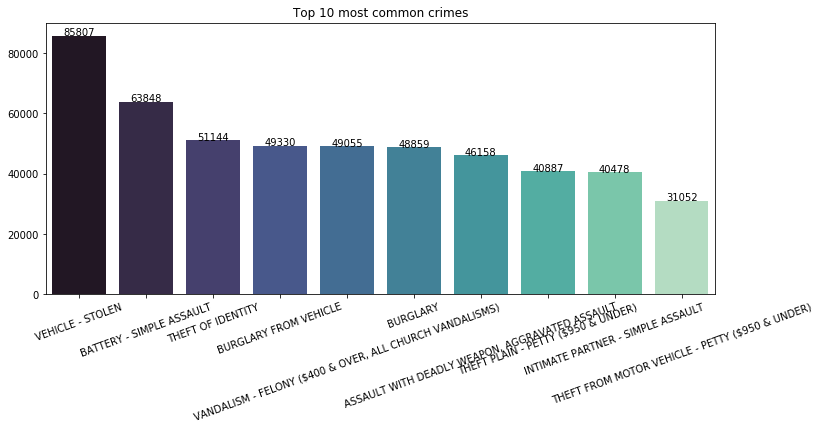

In [22]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the DataFrame by "Crm Cd Desc" and counting occurrences, ordering by count in descending order
crime_counts = df.groupBy("Crm Cd Desc").count().orderBy(col("count").desc())

# Collecting data to the driver for local plotting
crime_counts_data = crime_counts.limit(10).collect()

# Extracting crime types and counts from the collected data
crime_types = [row["Crm Cd Desc"] for row in crime_counts_data]
crime_counts_values = [row["count"] for row in crime_counts_data]

# Plotting a bar chart using seaborn
plt.figure(figsize=(12, 5))
g = sns.barplot(x=crime_types, y=crime_counts_values, palette='mako')

# Annotating data points on the plot
for i, value in enumerate(crime_counts_values):
    g.text(x=i, y=value - 2, s=value, ha='center')

# Adding title and labels to the plot
plt.title('Top 10 most common crimes')
plt.xticks(rotation=20)

# Saving the plot as an image file
plt.savefig("image.png")

# Optionally, upload the image to Google Cloud Storage
blob_name = "OutputImages/Top10CommonCrimes.png"
blob = gcs_bucket.blob(blob_name)
blob.upload_from_filename("image.png")

In [23]:
# Grouping the DataFrame by "AREA NAME" and counting occurrences
neighborhood_crime_counts = df.groupBy("AREA NAME").count()

# Calculating the average crime rate per neighborhood
average_crime_per_neighborhood = neighborhood_crime_counts.agg({"count": "mean"}).collect()[0][0]

# Printing the result
print("Average crime rate per neighborhood:", average_crime_per_neighborhood)

Average crime rate per neighborhood: 38236.0


In [24]:
# Calculating the average crime rate per neighborhood
average_crime_per_neighborhood = neighborhood_crime_counts.agg({"count": "mean"}).collect()[0][0]

# Filtering neighborhoods with crime rates higher than the average
high_crime_neighborhoods = neighborhood_crime_counts.filter(col("count") > average_crime_per_neighborhood)

# Displaying the neighborhoods with above-average crime rates
high_crime_neighborhoods.show(truncate=False)

+-----------+-----+
|AREA NAME  |count|
+-----------+-----+
|Hollywood  |42658|
|N Hollywood|39916|
|Newton     |40178|
|Southeast  |40971|
|Central    |53901|
|Pacific    |46915|
|Olympic    |40623|
|Southwest  |44931|
|77th Street|50732|
+-----------+-----+



In [ ]:
# Calculating the average crime count per neighborhood
average_crime_per_neighborhood = neighborhood_crime_counts.agg({"count": "mean"}).collect()[0][0]

# Filtering neighborhoods with above-average crime rates
high_crime_neighborhoods = neighborhood_crime_counts.filter(col("count") > average_crime_per_neighborhood)

# Extracting data for plotting directly with matplotlib
high_crime_neighborhoods_data = high_crime_neighborhoods.collect()

# Using seaborn color palette
colors = sns.color_palette('rocket')

# Plotting the bar chart with valid colors
plt.figure(figsize=(12, 5))
plt.bar([row["AREA NAME"] for row in high_crime_neighborhoods_data], [row["count"] for row in high_crime_neighborhoods_data], color=colors)
plt.title('Neighborhoods with Above-Average Crime Rates')
plt.xlabel('Area Name')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)

# Saving the plot as an image file
plt.savefig("image.png")

# Optionally, upload the image to Google Cloud Storage
blob_name = "OutputImages/NeighborhoodsWithAverageCrimeRates.png"
blob = gcs_bucket.blob(blob_name)
blob.upload_from_filename("image.png")

In [ ]:
# Grouping the DataFrame by 'Vict Sex' and counting occurrences
victim_sex_counts = df.groupBy('Vict Sex').count()

# Displaying the counts of victim sexes
victim_sex_counts.show()

In [ ]:
# Grouping the DataFrame by 'Vict Sex' and counting occurrences
victim_sex_counts = df.groupBy('Vict Sex').count()

# Collecting data to the driver for local plotting
victim_sex_counts_collected = victim_sex_counts.collect()

# Extracting counts and labels from the collected data
counts = [row['count'] for row in victim_sex_counts_collected]
labels = [row['Vict Sex'] for row in victim_sex_counts_collected]

# Plotting a pie chart using matplotlib
plt.figure(figsize=(4, 4))
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightseagreen']

plt.pie(counts, autopct='%0.1f%%', radius=1.25, wedgeprops={'edgecolor': 'white'},
        labels=labels, textprops={'size': 11}, shadow=True, startangle=70, explode=explode,
        colors=colors)

# Adding title to the plot
plt.title('Crime Rate against Genders\n')

# Saving the plot as an image file
plt.savefig("image.png")

# Optionally, upload the image to Google Cloud Storage
blob_name = "OutputImages/CrimeRateAgainstGenders.png"
blob = gcs_bucket.blob(blob_name)
blob.upload_from_filename("image.png")

In [ ]:
# Grouping the DataFrame by 'Vict Age' and counting occurrences, ordering by count in descending order
victim_age_counts = df.groupBy('Vict Age').count().orderBy('count', ascending=False)

# Selecting the top 10 victim age counts
top_10_victim_age_counts = victim_age_counts.select('Vict Age', 'count').limit(10)

# Displaying the top 10 victim age counts
top_10_victim_age_counts.show()

In [ ]:
# Extracting victim age values from the DataFrame
victim_age_values = df.select('Vict Age').rdd.flatMap(lambda x: x).collect()

# Plotting a histogram using matplotlib
plt.figure(figsize=(5, 2))
plt.hist(victim_age_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Count')

# Saving the plot as an image file
plt.savefig("image.png")

# Optionally, upload the image to Google Cloud Storage
blob_name = "OutputImages/VictimAge.png"
blob = gcs_bucket.blob(blob_name)
blob.upload_from_filename("image.png")

In [ ]:
# Grouping the DataFrame by 'Crm Cd Desc' and counting occurrences, ordering by count in descending order
crime_counts = df.groupBy('Crm Cd Desc').count().orderBy('count', ascending=False)

# Calculating the average crime counts
average_crime_counts = crime_counts.agg({'count': 'mean'}).collect()[0][0]

# Printing the result
print("Average Crime Counts:", average_crime_counts)

In [ ]:
# Filtering crime types with counts higher than the average crime counts
high_crime_counts = crime_counts.filter(col('count') > average_crime_counts)

# Printing crime types with above-average crime rates
print("Crime with Above-Average Crime Rates:")
high_crime_counts.show(truncate=False)

In [ ]:
# Filtering rows where 'Weapon Desc' is not 'Unknown'
df_filtered = df.filter(col('Weapon Desc') != 'Unknown')

# Grouping the filtered DataFrame by 'Weapon Desc' and counting occurrences, ordering by count in descending order
weapon_counts = df_filtered.groupBy('Weapon Desc').count().orderBy('count', ascending=False)

# Limiting to the top 5 rows
top_5_weapon_counts = weapon_counts.limit(5)

# Collecting data to the driver for local plotting
top_5_weapon_counts_data = top_5_weapon_counts.collect()

# Plotting a horizontal bar chart using matplotlib with viridis color map
plt.figure(figsize=(10, 6))
plt.barh([row['Weapon Desc'] for row in top_5_weapon_counts_data], [row['count'] for row in top_5_weapon_counts_data], color=plt.cm.viridis(range(len(top_5_weapon_counts_data))))
plt.title('Weapon Distribution (Top 5)')
plt.xlabel('Count')
plt.ylabel('Weapon Description')

# Saving the plot as an image file
plt.savefig("image.png")

# Optionally, upload the image to Google Cloud Storage
blob_name = "OutputImages/WeaponDistribution.png"
blob = gcs_bucket.blob(blob_name)
blob.upload_from_filename("image.png")

In [ ]:
# Grouping the DataFrame by 'Status Desc' and counting occurrences, ordering by count in descending order
status_counts = df.groupBy('Status Desc').count().orderBy('count', ascending=False)

# Displaying the counts for each 'Status Desc'
status_counts.show()